# Phân tích hồi qui tuyến tính (Phần 1)
Phân tích hồi qui tuyến tính (linear regression analysis) có lẽ là một trong những
phương pháp phân tích số liệu thông dụng nhất trong thống kê học. Anon từng viết “Cho
con người 3 vũ khí – hệ số tương quan, hồi qui tuyến tính và một cây bút, con người sẽ
sử dụng cả ba”! Trong chương này, tôi sẽ giới thiệu cách sử dụng R để phân tích hồi qui
tuyến tính và các phương pháp liên quan như hệ số tương quan và kiểm định giả thiết
thống kê.

**Ví dụ 1.** Để minh họa cho vấn đề, chúng ta thử xem xét nghiên cứu sau đây, mà
trong đó nhà nghiên cứu đo lường độ cholestrol trong máu của 18 đối tượng nam. Tỉ
trọng cơ thể (body mass index) cũng được ước tính cho mỗi đối tượng bằng công thức
tính BMI là lấy trọng lượng (tính bằng kg) chia cho chiều cao bình phương (m2). Kết quả
đo lường như sau:
Bảng 1. Độ tuổi, tỉ trọng cơ thể và cholesterol
| Mã số ID (id) | Độ tuổi (age) | BMI (bmi) | Cholesterol (chol) |
|---|---|---|---|
| 1 | 46 | 25.4 | 3.5 |
| 2 | 20 | 20.6 | 1.9 |
| 3 | 52 | 26.2 | 4.0 |
| 4 | 30 | 22.6 | 2.6 |
| 5 | 57 | 25.4 | 4.5 |
| 6 | 25 | 23.1 | 3.0 |
| 7 | 28 | 22.7 | 2.9 |
| 8 | 36 | 24.9 | 3.8 |
| 9 | 22 | 19.8 | 2.1 |
| 10 | 43 | 25.3 | 3.8 |
| 11 | 57 | 23.2 | 4.1 |
| 12 | 33 | 21.8 | 3.0 |
| 13 | 22 | 20.9 | 2.5 |
| 14 | 63 | 26.7 | 4.6 |
| 15 | 40 | 26.4 | 3.2 |
| 16 | 48 | 21.2 | 4.2 |
| 17 | 28 | 21.2 | 2.3 |
| 18 | 49 | 22.8 | 4.0 |

Nhìn sơ qua số liệu chúng ta thấy người có độ tuổi càng cao độ cholesterol cũng
càng cao. Chúng ta thử nhập số liệu này vào R và vẽ một biểu đồ tán xạ như sau:

In [21]:
age <- c(46,20,52,30,57,25,28,36,22,43,57,33,22,63,40,48,28,49)

In [22]:
bmi <-c(25.4,20.6,26.2,22.6,25.4,23.1,22.7,24.9,19.8,25.3,23.2,
21.8,20.9,26.7,26.4,21.2,21.2,22.8)

In [23]:
chol <- c(3.5,1.9,4.0,2.6,4.5,3.0,2.9,3.8,2.1,3.8,4.1,3.0,
2.5,4.6,3.2, 4.2,2.3,4.0)

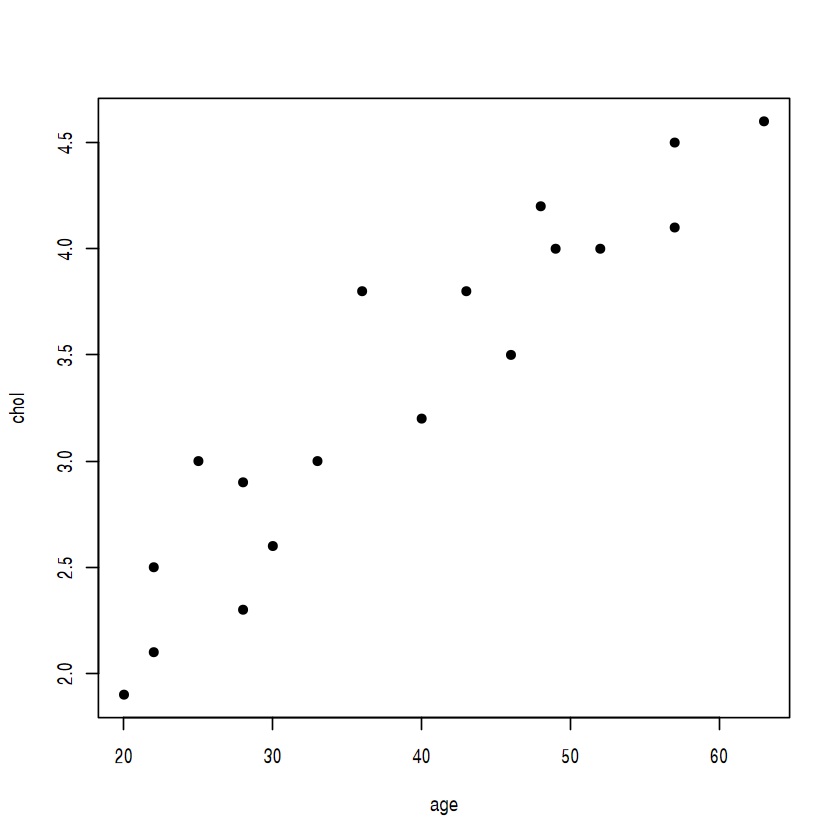

In [24]:
data <- data.frame(age, bmi, chol)
plot(chol ~ age, pch=16)

**Biểu đồ 10.1.** Liên hệ giữa độ tuổi và cholesterol.

Biểu đồ 10.1 trên đây gợi ý cho thấy mối liên hệ giữa độ tuổi (age) và cholesterol là một
đường thẳng (tuyến tính). Để **đo lường** mối liên hệ này, chúng ta có thể sử dụng hệ số
tương quan (coefficient of correlation).

## 10.1 Hệ số tương quan
Hệ số tương quan (r) là một chỉ số thống kê đo lường mối liên hệ tương quan giữa
hai biến số, như giữa độ tuổi (x) và cholesterol (y). Hệ số tương quan có giá trị từ -1 đến 1. Hệ số tương quan bằng 0 (hay gần 0) có nghĩa là hai biến số không có liên hệ gì với
nhau; ngược lại nếu hệ số bằng -1 hay 1 có nghĩa là hai biến số có một mối liên hệ tuyệt
đối. Nếu giá trị của hệ số tương quan là âm (r <0) có nghĩa là khi x tăng cao thì y giảm
(và ngược lại, khi x giảm thì y tăng); nếu giá trị hệ số tương quan là dương (r > 0) có
nghĩa là khi x tăng cao thì y cũng tăng, và khi x tăng cao thì y cũng giảm theo.

Thực ra có nhiều hệ số tương quan trong thống kê, nhưng ở đây tôi sẽ trình bày 3
hệ số tương quan thông dụng nhất: **hệ số tương quan Pearson r, Spearman ρ, và Kendall
τ**.

### 10.1.1 Hệ số tương quan Pearson
Cho hai biến số x và y từ n mẫu, hệ số tương quan Pearson được ước tính bằng
công thức sau đây:

$$ r = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^2 \sum_{i=1}^{n}(y_{i}-\bar{y})^2}}$$

Trong đó, như định nghĩa phần trên, $\bar x$ và $\bar y$ là giá trị trung bình của biến số x và
y. Để ước tính hệ số tương quan giữa độ tuổi age và cholesterol, chúng ta có thể sử
dụng hàm cor(x,y) như sau:

In [25]:
cor(age, chol)

[1] 0.9367261

Chúng ta có thể kiểm định giả thiết hệ số tương quan bằng 0 (tức hai biến x và y
không có liên hệ). Phương pháp kiểm định này thường dựa vào phép biến đổi Fisher mà
R đã có sẵn một hàm cor.test để tiến hành việc tính toán.

In [26]:
cor.test(age, chol)


	Pearson's product-moment correlation

data:  age and chol
t = 10.704, df = 16, p-value = 1.058e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8350463 0.9765306
sample estimates:
      cor 
0.9367261 


Kết quả phân tích cho thấy kiểm định t = 10.70 với trị số p = 1.058e-08; do đó,
chúng ta có bằng chứng để kết luận rằng mối liên hệ giữa độ tuổi và cholesterol có ý
nghĩa thống kê. Kết luận này cũng chính là kết luận chúng ta đã đi đến trong phần phân
tích hồi qui tuyến tính trên.

### 10.1.2 Hệ số tương quan Spearman ρ
Hệ số tương quan Pearson chỉ hợp lí nếu biến số x và y tuân theo luật phân phối
chuẩn. Nếu x và y không tuân theo luật phân phối chuẩn, chúng ta phải sử dụng một hệ
số tương quan khác tên là Spearman, một phương pháp phân tích phi tham số. Hệ số này được ước tính bằng cách biến đổi hai biến số x và y thành thứ bậc (rank), và xem độ
tương quan giữa hai dãy số bậc. Do đó, hệ số còn có tên tiếng Anh là Spearman’s Rank
correlation. R ước tính hệ số tương quan Spearman bằng hàm cor.test với thông số
method=”spearman” như sau:

In [27]:
cor.test(age, chol, method="spearman")

Warning message in cor.test.default(age, chol, method = "spearman"):
"Cannot compute exact p-value with ties"



	Spearman's rank correlation rho

data:  age and chol
S = 51.158, p-value = 2.57e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.947205 


Kết quả phân tích cho thấy giá trị rho = 0.947, và trị số p = 2.57e-09. Kết quả từ
phân tích này cũng không khác với phân tích hồi qui tuyến tính: mối liên hệ giữa độ tuổi
và cholesterol rất cao và có ý nghĩa thống kê.

### 10.1.3 Hệ số tương quan Kendall τ
Hệ số tương quan Kendall (cũng là một phương pháp phân tích phi tham số) được
ước tính bằng cách tìm các cặp số (x, y) “song hành" với nhau. Một cặp (x, y) song hành
ở đây được định nghĩa là hiệu (độ khác biệt) trên trục hoành có cùng dấu hiệu (dương hay
âm) với hiệu trên trục tung. Nếu hai biến số x và y không có liên hệ với nhau, thì số cặp
song hành bằng hay tương đương với số cặp không song hành.

Bởi vì có nhiều cặp phải kiểm định, phương pháp tính toán hệ số tương quan
Kendall đòi hỏi thời gian của máy tính khá cao. Tuy nhiên, nếu một dữ liệu dưới 5000
đối tượng thì một máy vi tính có thể tính toán khá dễ dàng. R dùng hàm cor.test với
thông số method=”kendall” để ước tính hệ số tương quan Kendall:

In [28]:
cor.test(age, chol, method="kendall")

Warning message in cor.test.default(age, chol, method = "kendall"):
"Cannot compute exact p-value with ties"



	Kendall's rank correlation tau

data:  age and chol
z = 4.755, p-value = 1.984e-06
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.8333333 


## 10.2 Mô hình của hồi qui tuyến tính đơn giản
### 10.2.1 vài dòng lí thuyết
Để tiện việc theo dõi và mô tả mô hình, gọi độ tuổi cho cá nhân $i$ là $x_i$ và
cholesterol là $y_i$. Ở đây i = 1, 2, 3, …, 18. Mô hình hồi tuyến tính phát biểu rằng:
$$ y_i = \alpha + \beta x_1 + \epsilon_1     \quad [1] $$

Nói cách khác, phương trình trên giả định rằng độ cholesterol của một cá nhân bằng một
hằng số $\alpha$ cộng với một hệ số $\beta$ liên quan đến độ tuổi, và một sai số $\epsilon_1$. Trong phương trình trên, $\alpha$ là chặn (intercept, tức giá trị lúc $x_1 =0$), và $\beta$ là độ dốc (slope hay gradient).

Trong thực tế, $\alpha$ và $\beta$ là hai thông số (paramater, còn gọi là regression coefficient hay hệ số hồi qui), và $\epsilon_1$ là một biến số theo luật phân phối chuẩn với trung bình 0 và phương sai $\sigma^2$.


Các thông số $\alpha$, $\beta$ và $\sigma^2$ phải được ước tính từ dữ liệu. Phương pháp để ước tính các thông số này là phương pháp bình phương nhỏ nhất (least squares method). Như tên gọi, phương pháp bình phương nhỏ nhất tìm giá trị $\alpha$, $\beta$ sao cho $\sum_{i=1}^{n}[y_{i}-(\alpha+\beta x_{i})]^2$ nhỏ nhất. Sau vài thao tác toán, có thể chứng minh dễ dàng rằng, ước số cho $\alpha$, $\beta$ đáp ứng điều kiện đó là:

$$\hat{\beta}=\frac{\sum_{i=1}^{n}(x_{i}-\overline{x})(y_{i}-\overline{y})}{\sum_{i=1}^{n}(x_{i}-\overline{x})^{2}} \quad [2]$$

$$\hat{\alpha}=\overline{y}-\hat{\beta}\overline{x} \quad [3]$$

Ở đây, $\bar x$ và $\bar y$ là giá trị trung bình của biến số x và y. Chú ý, tôi viết $\alpha$ và $\beta$
(với dấu mũ phía trên) là để nhắc nhở rằng đây là hai ước số (estimates) của $\hat{\alpha}$ và $\hat{\beta}$, chứ không phải $\alpha$ và $\beta$ (chúng ta không biết chính xác $\alpha$ và $\beta$, nhưng chỉ có thể ước tính mà thôi).
Sau khi đã có ước số $\hat{\alpha}$ và $\hat{\beta}$, chúng ta có thể ước tính độ cholesterol trung bình
cho từng độ tuổi như sau:
$$\hat{y}_{i} = \hat{\alpha} + \hat{\beta}x_{i}$$

Tất nhiên, $\hat{y}_{i}$ ở đây chỉ là số trung bình cho độ tuổi $x_i$, và phần còn lại (tức $y_i - \hat{y}_{i}$ ) gọi là phần dư (residual). Và phương sai của phần dư có thể ước tính như sau:

$$s^2 = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{n-2} \quad [4]$$

$s^2$ chính là ước số của $σ^2$.

Trong phân tích hồi qui tuyến tính, thông thường chúng ta muốn biết hệ số
$\beta$ = 0 hay khác 0. Nếu $\beta$ bằng 0, thì cũng có nghĩa là không có mối liên hệ gì giữa x và y;
nếu $\beta$ khác với 0, chúng ta có bằng chứng để phát biểu rằng x và y có liên quan nhau. Để
kiểm định giả thiết $\beta$ = 0 chúng ta dùng xét nghiệm t sau đây:

$$t = \frac{\hat{\beta}}{SE(\hat{\beta})} \quad [5]$$

$SE(\hat{\beta})$ có nghĩa là sai số chuẩn (standard error) của ước số $\beta$. Trong phương trình trên,
t tuân theo luật phân phối t với bậc tự do $n-2$ (nếu thật sự $\beta$ = 0).

### 10.2.2 Phân tích hồi qui tuyến tính đơn giản bằng R

Hàm lm (viết tắt từ linear model) trong R có thể tính toán các giá trị của $\alpha$ và $\beta$, cũng như $s^2$ một cách nhanh gọn. Chúng ta tiếp tục với ví dụ bằng R như sau:

In [29]:
lm(chol ~ age)


Call:
lm(formula = chol ~ age)

Coefficients:
(Intercept)          age  
    1.08922      0.05779  


Trong lệnh trên, **chol ~ age** có nghĩa là mô tả chol là một hàm số của age. Kết
quả tính toán của lm cho thấy $\hat\alpha$ = 1.0892 và $\hat\beta$= 0.05779. Nói cách khác, với hai thông số này, chúng ta có thể ước tính độ cholesterol cho bất cứ độ tuổi nào trong khoảng tuổi của mẫu bằng phương trình tuyến tính:
$$ \hat{y_i} = 1.08922 + 0.05779 x age$$

Phương trình này có nghĩa là khi độ tuổi tăng 1 năm thì độ cholesterol tăng khoảng 0.058
mmol/L.

Thật ra, hàm lm còn cung cấp cho chúng ta nhiều thông tin khác, nhưng chúng ta phải
đưa các thông tin này vào một object. Gọi object đó là reg, thì lệnh sẽ là:

In [30]:
reg <- lm(chol ~ age)
summary(reg)


Call:
lm(formula = chol ~ age)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40729 -0.24133 -0.04522  0.17939  0.63040 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.089218   0.221466   4.918 0.000154 ***
age         0.057788   0.005399  10.704 1.06e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3027 on 16 degrees of freedom
Multiple R-squared:  0.8775,	Adjusted R-squared:  0.8698 
F-statistic: 114.6 on 1 and 16 DF,  p-value: 1.058e-08


Lệnh thứ hai, summary(reg), yêu cầu R liệt kê các thông tin tính toán trong reg. Phần kết quả chia làm 3 phần:

**(a)** Phần 1 mô tả phần dư (residuals) của mô hình hồi qui:

Chúng ta biết rằng trung bình phần dư phải là 0, và ở đây, số trung vị là -0.04, cũng
không xa 0 bao nhiêu. Các số quantiles 25% (1Q) và 75% (3Q) cũng khá cân đối chung
quan số trung vị, cho thấy phần dư của phương trình này tương đối cân đối.

**(b)** Phần hai trình bày ước số của  $\alpha$ và $\beta$ cùng với sai số chuẩn và giá trị của kiểm định t. Giá trị kiểm định t cho $\beta$ là 10.74 với trị số p = 1.06e-08, cho thấy $\beta$ không phải bằng 0. Nói cách khác, chúng ta có bằng chứng để cho rằng có một mối liên hệ giữa cholesterol và độ tuổi, và mối liên hệ này có ý nghĩa thống kê.

**(c)** Phần ba của kết quả cho chúng ta thông tin về phương sai của phần dư (residual mean square). Ở đây, $s^2$ = 0.3027. Trong kết quả này còn có kiểm định F, cũng chỉ là một kiểm định xem có quả thật $\beta$ bằng 0, tức có ý nghĩa tương tự như kiểm định t trong phần trên. Nói chung, **trong trường hợp phân tích hồi qui tuyến tính đơn giản (với một yếu tố) chúng ta không cần phải quan tâm đến kiểm định F**.

Ngoài ra, phần 3 còn cho chúng ta một thông tin quan trọng, đó là trị số $R^2$ hay hệ số xác
định bội (coefficient of determination). Hệ số này được ước tính bằng công thức:
$$R^2 = \frac{\sum_{i=1}^{n}(\hat{y}_{i}-\bar{y})^2}{\sum_{i=1}^{n}(y_{i}-\bar{y})^2} \quad [6]$$

Tức là bằng tổng bình phương giữa số ước tính và trung bình chia cho tổng bình phương
số quan sát và trung bình. Trị số $R^2$ trong ví dụ này là 0.8775, có nghĩa là phương trình
tuyến tính (với độ tuổi là một yếu tố) giải thích khoảng 88% các khác biệt về độ
cholesterol giữa các cá nhân. Tất nhiên trị số $R^2$ có giá trị từ 0 đến 100% (hay 1). Giá trị
$R^2$ càng cao là một dấu hiệu cho thấy mối liên hệ giữa hai biến số độ tuổi và cholesterol
càng chặt chẽ.

Một hệ số cũng cần đề cập ở đây là **hệ số điều chỉnh xác định bội** (mà trong kết
quả trên R gọi là “Adjusted R-squared”). Đây là hệ số cho chúng ta biết mức độ cải tiến
của phương sai phần dư (residual variance) do yếu tố độ tuổi có mặt trong mô hình tuyến
tính. Nói chung, hệ số này không khác mấy so với hệ số xác định bội, và chúng ta cũng
không cần chú tâm quá mức.

### 10.2.3 Giả định của phân tích hồi qui tuyến tính
Tất cả các phân tích trên dựa vào một số giả định quan trọng như sau:

(a) x là một biến số cố định hay fixed, (“cố định” ở đây có nghĩa là không có sai sót ngẫu
nhiên trong đo lường);

(b) $\epsilon_{i}$ phân phối theo luật phân phối chuẩn;

(c) $\epsilon_{i}$ có giá trị trung bình (mean) là 0;

(d) $\epsilon_{i}$ có phương sai $σ^2$ cố định cho tất cả $x_i$; và

(e) các giá trị liên tục của  $\epsilon_{i}$ không có liên hệ tương quan với nhau (nói cách khác, $\epsilon_{1}$ và $\epsilon_{2}$ không có liên hệ với nhau).

Nếu các giả định này không được đáp ứng thì phương trình mà chúng ta ước tính
có vấn đề hợp lí (validity). Do đó, trước khi trình bày và diễn dịch mô hình trên, chúng
ta cần phải kiểm tra xem các giả định trên có đáp ứng được hay không. Trong trường
hợp này, giả định (a) không phải là vấn đề, vì độ tuổi không phải là một biến số ngẫu
nhiên, và không có sai số khi tính độ tuổi của một cá nhân.

Đối với các giả định (b) đến (e), cách kiểm tra đơn giản nhưng hữu hiệu nhất là
bằng cách xem xét mối liên hệ giữa $\hat{y}$ ,
$x_i$ , và phần dư $e_i$ ($e_i = y_i - \hat{y_i}$) bằng những đồ thị tán xạ.

Với lệnh **fitted()** chúng ta có thể tính toán $\hat{y_i}$ cho từng cá nhân như sau (ví dụ
đối với cá nhân 1, 46 tuổi, độ cholestrol có thể tiên đoán như sau: 1.08922 + 0.05779
x 46 = 3.747).

In [31]:
fitted(reg)

1        2        3        4        5        6        7        8 
3.747483 2.244985 4.094214 2.822869 4.383156 2.533927 2.707292 3.169600 
       9       10       11       12       13       14       15       16 
2.360562 3.574118 4.383156 2.996234 2.360562 4.729886 3.400753 3.863060 
      17       18 
2.707292 3.920849

Với lệnh **resid()** chúng ta có thể tính toán phần dư $e_i$ cho từng cá nhân như sau (với đối tượng 1, $e_i$ = 3.5 – 3.74748 = -0.24748):

In [32]:
resid(reg)

1            2            3            4            5            6 
-0.247483426 -0.344985415 -0.094213736 -0.222869265  0.116844338  0.466072660 
           7            8            9           10           11           12 
 0.192707505  0.630400424 -0.260562185  0.225881729 -0.283155662  0.003765579 
          13           14           15           16           17           18 
 0.139437815 -0.129885972 -0.200753116  0.336939804 -0.407292495  0.079151419

Để kiểm tra các giả định trên, chúng ta có thể vẽ một loạt 4 đồ thị mà tôi sẽ giải
thích sau đây:

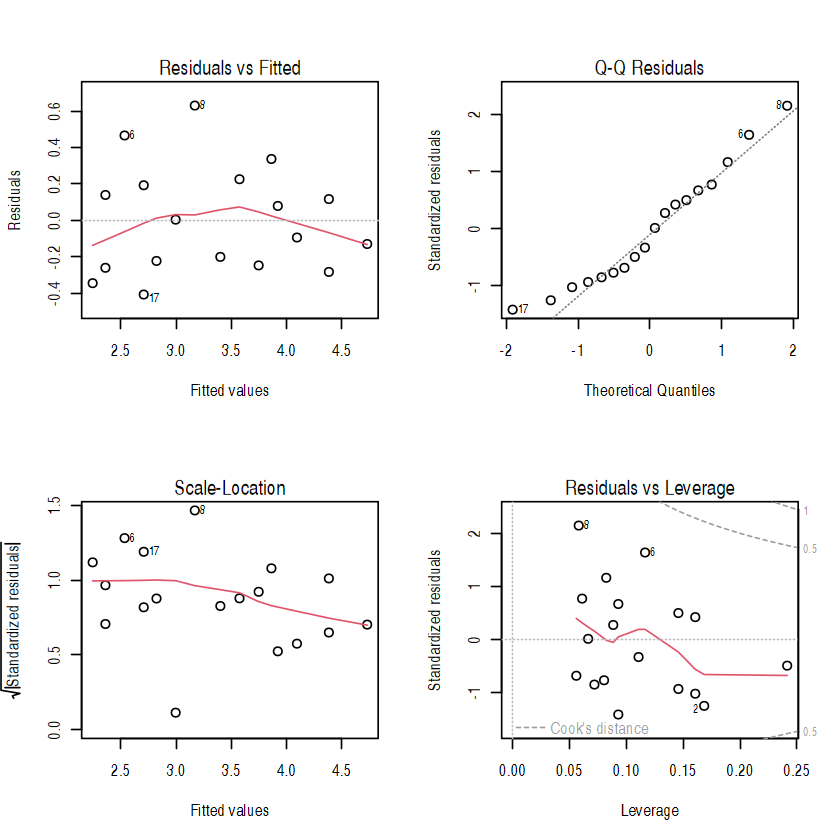

In [33]:
op <- par(mfrow=c(2,2)) #yêu cầu R dành ra 4 cửa sổ
plot(reg) #vẽ các đồ thị trong reg

**Biểu đồ 10.2.** Phân tích phần dư để kiểm tra các giả định trong phân tích hồi
qui tuyến tính.

(a) Đồ thị bên trái dòng 1 vẽ phần dư $e_i$ và giá trị tiên đoán cholesterol $\hat{y_1}$ . Đồ thị này cho
thấy các giá trị phần dư tập chung quanh đường y = 0, cho nên giả định (c), hay $\epsilon_{i}$ có giá trị trung bình 0, là có thể chấp nhận được.

(b) Đồ thị bên phải dòng 1 vẽ giá trị phần dư và giá trị kì vọng dựa vào phân phối chuẩn.
Chúng ta thấy các số phần dư tập trung rất gần các giá trị trên đường chuẩn, và do đó, giả
định (b), tức $\epsilon_{i}$ phân phối theo luật phân phối chuẩn, cũng có thể đáp ứng.

(c) Đồ thị bên trái dòng 2 vẽ căn số phần dư chuẩn (standardized residual) và giá trị của
$\hat{y_1}$ . Đồ thị này cho thấy không có gì khác nhau giữa các số phần dư chuẩn cho các giá trị
của $\hat{y_1}$ , và do đó, giả định (d), tức $\epsilon_{i}$ có phương sai $σ^2$ cố định cho tất cả $x_i$, cũng có thể
đáp ứng.

Nói chung qua phân tích phần dư, chúng ta có thể kết luận rằng mô hình hồi qui tuyến
tính mô tả mối liên hệ giữa độ tuổi và cholesterol một cách khá đầy đủ và hợp lí.

### 10.2.4 Mô hình tiên đoán
Sau khi mô hình tiên đoán cholesterol đã được kiểm tra và tính hợp lí đã được
thiết lập, chúng ta có thể vẽ đường biểu diễn của mối liên hệ giữa độ tuổi và cholesterol
bằng lệnh abline như sau (xin nhắc lại object của phân tích là reg):

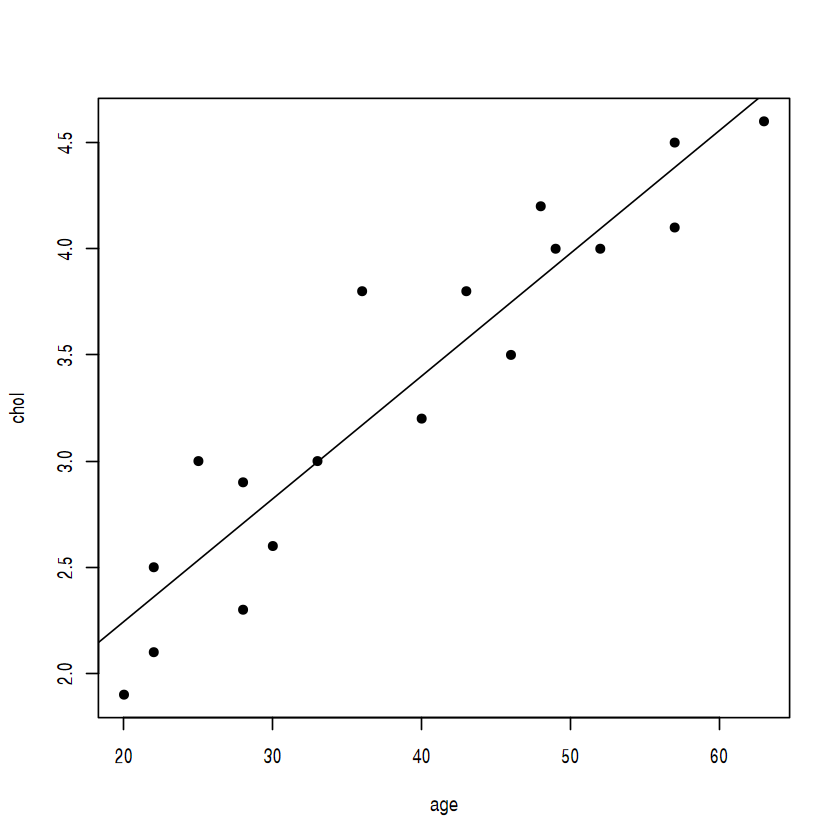

In [34]:
plot(chol ~ age, pch=16)
abline(reg)

**Biểu đồ 10.3.** Đường biểu diễn mối liên hệ giữa độ tuổi (age)
và cholesterol.

Nhưng mỗi giá trị $\hat{y_i}$ được tính từ ước số $\alpha$ và $\beta$, mà các ước số này đều có sai
số chuẩn, cho nên giá trị tiên đoán $\hat{y_i}$ cũng có sai số. Nói cách khác, $\hat{y_i}$ chỉ là trung bình,
nhưng trong thực tế có thể cao hơn hay thấp hơn tùy theo chọn mẫu. Khoảng tin cậy
95% này có thể ước tính qua R bằng các lệnh sau đây:

In [35]:
reg <- lm(chol ~ age)
new <- data.frame(age = seq(15, 70, 5))

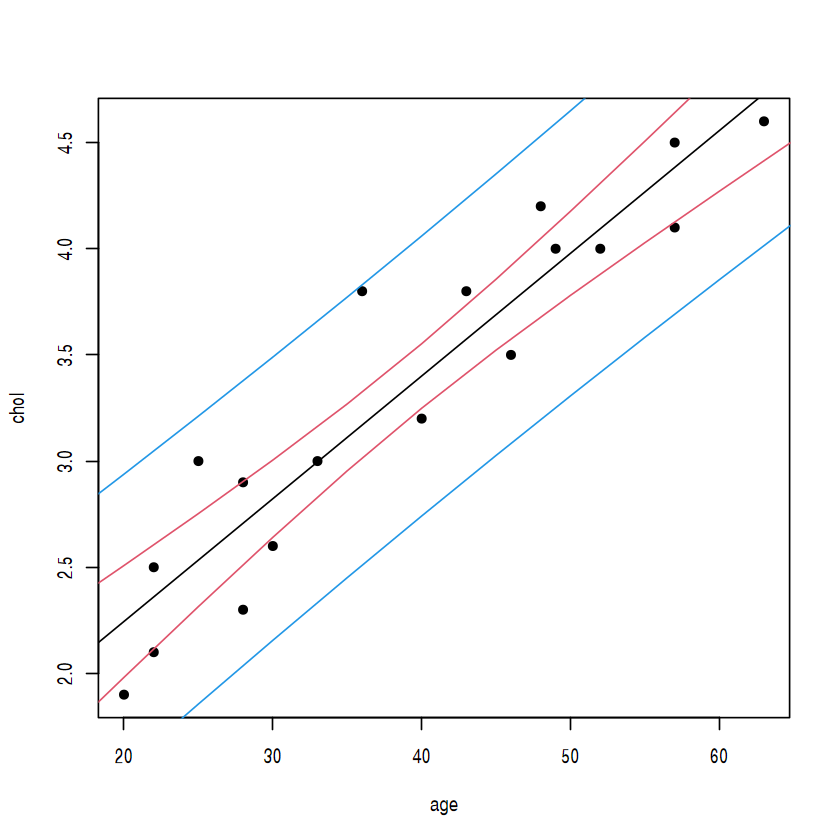

In [36]:
pred.w.plim <- predict.lm(reg, new, interval="prediction")
pred.w.clim <- predict.lm(reg, new, interval="confidence")
resc <- cbind(pred.w.clim, new)
resp <- cbind(pred.w.plim, new)
plot(chol ~ age, pch=16)
lines(resc$fit ~ resc$age)
lines(resc$lwr ~ resc$age, col=2)
lines(resc$upr ~ resc$age, col=2)
lines(resp$lwr ~ resp$age, col=4)
lines(resp$upr ~ resp$age, col=4)

**Biểu đồ 10.4.** Giá trị tiên đoán và khoảng tin cậy 95%.
Biểu đồ trên vẽ giá trị tiên đoán trung bình $\hat{y_i}$
 (đường thẳng màu đen), và khoảng tin cậy
95% của giá trị này là đường màu đỏ. Ngoài ra, đường màu xanh là khoảng tin cậy của
giá trị tiên đoán cholesterol cho một độ tuổi mới trong quần thể.

### 10.3 Mô hình hồi qui tuyến tính đa biến (multiple linear regression)

Mô hình được diễn đạt qua phương trình [1]:
$${y}_{i} = {\alpha} + {\beta}x_{i} + \epsilon_{i}$$
có một yếu tố duy
nhất (đó là x), và vì thế thường được gọi là mô hình hồi qui tuyến tính đơn giản (simple linear regression model). Trong thực tế, chúng ta có thể phát triển mô hình này thành
nhiều biến, chứ không chỉ giới hạn một biến như trên, chẳng hạn như:
$$
\begin{aligned}
y_i &= \alpha + \beta_1x_{1i} + \beta_2x_{2i} + ... + \beta_kx_{ki} + \varepsilon_i \quad [7]
\\
y_1 &= \alpha + \beta_1x_{11} + \beta_2x_{21} + ... + \beta_kx_{k1} + \varepsilon_1 \\
y_2 &= \alpha + \beta_1x_{12} + \beta_2x_{22} + ... + \beta_kx_{k2} + \varepsilon_2 \\
y_3 &= \alpha + \beta_1x_{13} + \beta_2x_{23} + ... + \beta_kx_{k3} + \varepsilon_3 \\
&\vdots \\
y_n &= \alpha + \beta_1x_{1n} + \beta_2x_{2n} + ... + \beta_kx_{kn} + \varepsilon_n
\end{aligned}
$$

Chú ý trong phương trình trên, chúng ta có nhiều biến x ($x_1, x_2, … x_k$), và mỗi biến có
một thông số
$\beta_j$ (j = 1, 2, …, k) cần phải ước tính. Vì thế mô hình này còn được gọi là
mô hình hồi qui tuyến tính đa biến.

Phương pháp ước tính $beta_j$ cũng chủ yếu dựa vào phương pháp bình phương nhỏ nhất. Gọi $ \begin{aligned} \hat{y_i} &= \hat{\alpha} + \hat\beta_1x_{1i} + \hat\beta_2x_{1i} + ... + \hat\beta_kx_{ki} \end{aligned}$ là ước tính của $y_i$ , phương pháp bình phương nhỏ nhất tìm giá trị $\hat{\alpha}, \hat{\beta}_1, \hat{\beta}_2, ..., \hat{\beta}_k$ sao cho $\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^2$ nhỏ nhất. Đối với mô hình hồi qui tuyến tính đa biến, cách viết và mô tả mô hình gọn nhất là dùng kí hiệu ma trận. Mô hình [7] có thể thể hiện bằng kí hiệu ma trận như sau:
 $$ Y = X\beta + \epsilon $$

Trong đó: Y là một vector n x 1, X là một matrix n x k phần tử, $\beta$ là một vector k x 1, và
$\epsilon $ là vector gồm n x 1 phần tử:

$$
Y = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}, \quad
X = \begin{bmatrix}
1 & x_{11} & x_{21} & \dots & x_{k1} \\
1 & x_{12} & x_{22} & \dots & x_{k2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1n} & x_{2n} & \dots & x_{kn}
\end{bmatrix}, \quad
\beta = \begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_k
\end{bmatrix}, \quad
\varepsilon = \begin{bmatrix}
\varepsilon_1 \\
\varepsilon_2 \\
\vdots \\
\varepsilon_n
\end{bmatrix}
$$
Phương pháp bình phương nhỏ nhất giải vector β bằng phương trình sau đây:
$$\hat{\beta}=(X^TX)^{-1}X^TY$$

và tổng bình phương phần dư:

$$\varepsilon^T \varepsilon = ||Y - \hat{Y}||^2$$

**Ví dụ 2.** Chúng ta quay lại nghiên cứu về mối liên hệ giữa độ tuổi, bmi và
cholesterol. Trong ví dụ, chúng ta chỉ mới xét mối liên hệ giữa độ tuổi và cholesterol, mà
chưa xem đến mối liên hệ giữa cả hai yếu tố độ tuổi và bmi và cholesterol. Biểu đồ sau
đây cho chúng ta thấy mối liên hệ giữa ba biến số này:

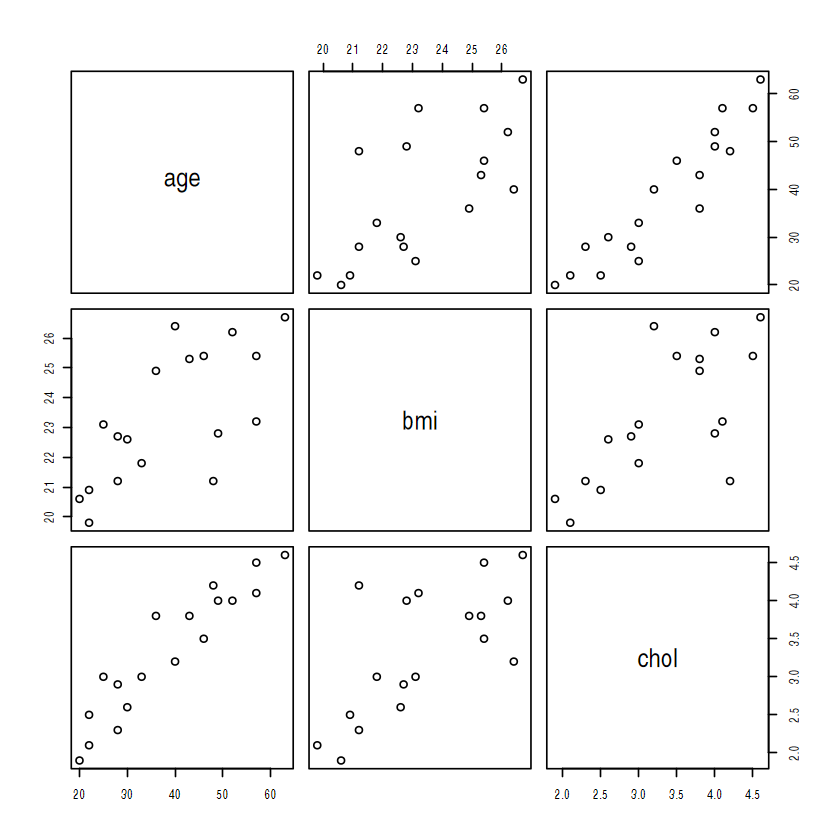

In [37]:
pairs(data)

**Biểu đồ 10.5.** Giá trị tiên đoán và khoảng tin cậy 95%

Cũng như giữa độ tuổi và cholesterol, mối liên hệ giữa bmi và cholesterol cũng gần tuân
theo một đường thằng. Biểu đồ trên còn cho chúng ta thấy độ tuổi và bmi có liên hệ với
nhau. Thật vậy, phân tích hồi qui tuyến tính đơn giản giữa bmi và cholesterol cho thấy
như mối liên hệ này có ý nghĩa thống kê:


In [38]:
summary(lm(chol ~ bmi))


Call:
lm(formula = chol ~ bmi)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9403 -0.3565 -0.1376  0.3040  1.4330 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2.83187    1.60841  -1.761  0.09739 . 
bmi          0.26410    0.06861   3.849  0.00142 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.623 on 16 degrees of freedom
Multiple R-squared:  0.4808,	Adjusted R-squared:  0.4483 
F-statistic: 14.82 on 1 and 16 DF,  p-value: 0.001418


BMI giải thích khoảng 48% độ dao động về cholesterol giữa các cá nhân. Nhưng vì BMI
cũng có liên hệ với độ tuổi, chúng ta muốn biết nếu hai yếu tố này được phân tích cùng
một lúc thì yếu tố nào quan trọng hơn. Để biết ảnh hưởng của cả hai yếu tố age ($x_1$) và
bmi (tạm gọi là $x_2$) đến cholesterol ($y$) qua một mô hình hồi qui tuyến tính đa biến, và mô
hình đó là:
$$ y_i = \alpha + \beta_1x_{1i} + \beta_2x_{2i} + \varepsilon_i$$

hay phương trình cũng có thể mô tả bằng kí hiệu ma trận:  $ Y = X\beta + \epsilon $ mà tôi vừa trình
bày trên. Ở đây, $Y$ là một vector vector 18 x 1, $X$ là một matrix 18 x 2 phần tử, $\beta$ và một
vector 2 x 1, và $\epsilon$ là vector gồm 18 x 1 phần tử. Để ước tính hai hệ số hồi qui, $\beta_1$ và
$\beta_2$ chúng ta cũng ứng dụng hàm lm() trong R như sau:

In [39]:
mreg <- lm(chol ~ age + bmi)
summary(mreg)


Call:
lm(formula = chol ~ age + bmi)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3762 -0.2259 -0.0534  0.1698  0.5679 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.455458   0.918230   0.496    0.627    
age         0.054052   0.007591   7.120  3.5e-06 ***
bmi         0.033364   0.046866   0.712    0.487    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3074 on 15 degrees of freedom
Multiple R-squared:  0.8815,	Adjusted R-squared:  0.8657 
F-statistic: 55.77 on 2 and 15 DF,  p-value: 1.132e-07


Kết quả phân tích trên cho thấy ước số $\hat{\alpha}$ = 0.455,  $\hat{\beta_1}$ = 0.054 và
$\hat{\beta_2}$ = 0.0333. Nói cách
khác, chúng ta có phương trình ước đoán độ cholesterol dựa vào hai biến số độ tuổi và
bmi như sau:

Phương trình cho biết khi độ tuổi tăng 1 năm thì cholesterol tăng 0.054 mg/L (ước số này
không khác mấy so với 0.0578 trong phương trình chỉ có độ tuổi), và mỗi 1 kg/m2 tăng
BMI thì cholesterol tăng 0.0333 mg/L. Hai yếu tố này “giải thích” khoảng 88.2% ($R^2$ =
0.8815) độ dao động của cholesterol giữa các cá nhân.

Chúng ta chú ý phương trình với độ tuổi (trong phân tích phần trước) giải thích
khoảng 87.7% độ dao động cholesterol giữa các cá nhân. Khi chúng ta thêm yếu tố BMI,
hệ số này tăng lên 88.2%, tức chỉ 0.5%. Câu hỏi đặt ra là 0.5% tăng trưởng này có ý
nghĩa thống kê hay không. Câu trả lời có thể xem qua kết quả kiểm định yếu tố bmi với
trị số p = 0.487. Như vậy, bmi không cung cấp cho chúng thêm thông tin hay tiên đoán
cholesterol hơn những gì chúng ta đã có từ độ tuổi. Nói cách khác, khi độ tuổi đã được
xem xét, thì ảnh hưởng của bmi không còn ý nghĩa thống kê. Điều này có thể hiểu được,
bởi vì qua Biểu đồ 10.5 chúng ta thấy độ tuổi và bmi có một mối liên hệ khá cao. Vì hai
biến này có tương quan với nhau, chúng ta không cần cả hai trong phương trình. (Tuy
nhiên, ví dụ này chỉ có tính cách minh họa cho việc tiến hành phân tích hồi qui tuyến tính
đa biến bằng R, chứ không có ý định mô phỏng dữ liệu theo định hướng sinh học).

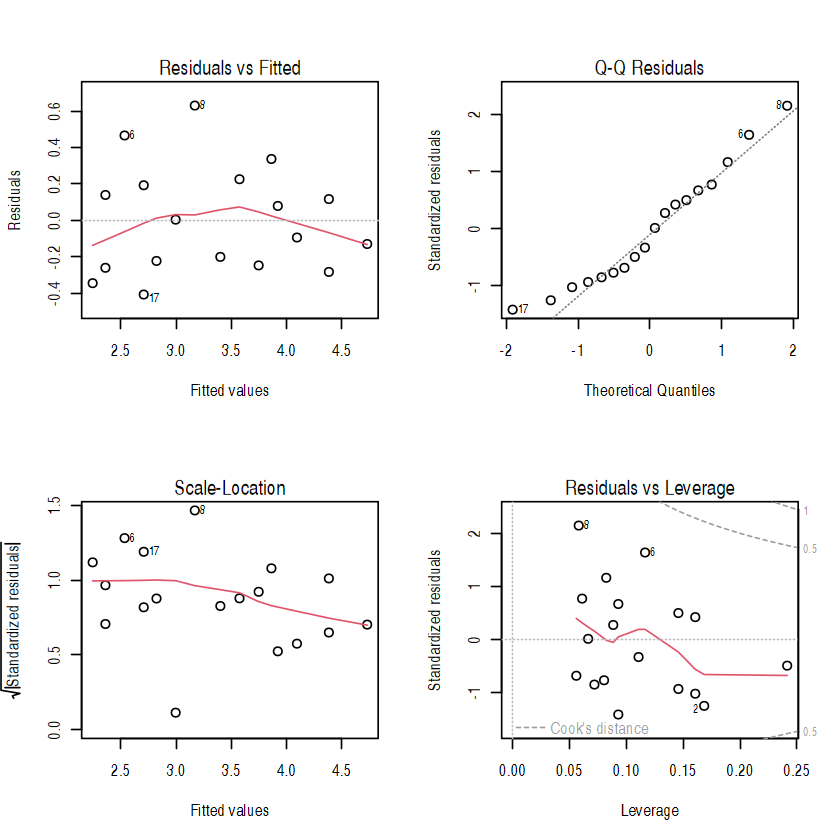

In [40]:
op <- par(mfrow=c(2,2)) #yêu cầu R dành ra 4 cửa sổ
plot(reg) #vẽ các đồ thị trong reg

**Biểu đồ 10.6.** Phân tích phần dư để kiểm tra các giả định trong
phân tích hồi qui tuyến tính đa biến.